   Match id        Date   Season           Batting team  \
0    335982  18-04-2008  2007/08  Kolkata Knight Riders   
1    335982  18-04-2008  2007/08  Kolkata Knight Riders   
2    335982  18-04-2008  2007/08  Kolkata Knight Riders   
3    335982  18-04-2008  2007/08  Kolkata Knight Riders   
4    335982  18-04-2008  2007/08  Kolkata Knight Riders   

                  Bowling team  Innings No  Ball No   Bowler      Striker  \
0  Royal Challengers Bangalore           1      0.1  P Kumar   SC Ganguly   
1  Royal Challengers Bangalore           1      0.2  P Kumar  BB McCullum   
2  Royal Challengers Bangalore           1      0.2  P Kumar  BB McCullum   
3  Royal Challengers Bangalore           1      0.3  P Kumar  BB McCullum   
4  Royal Challengers Bangalore           1      0.4  P Kumar  BB McCullum   

   Non Striker  runs_scored  extras type of extras  score score/wicket  \
0  BB McCullum            0       1        legbyes      1          1/0   
1   SC Ganguly            0       

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


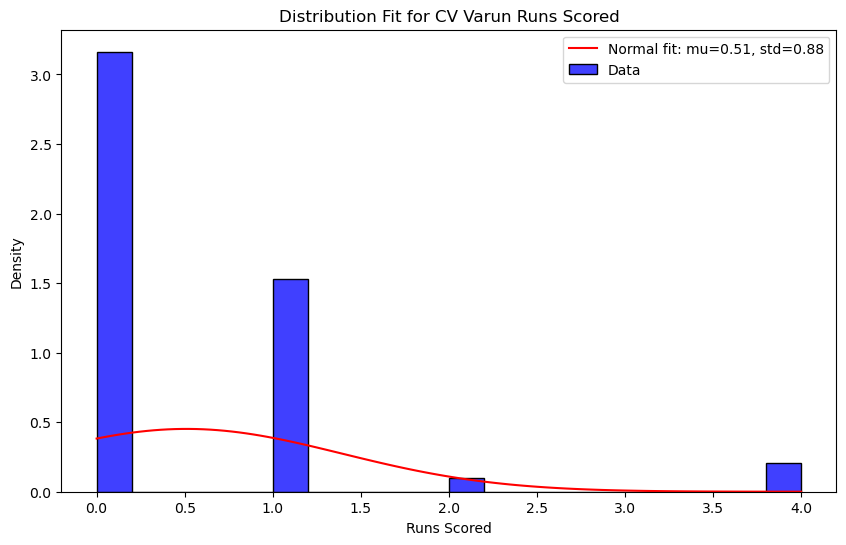

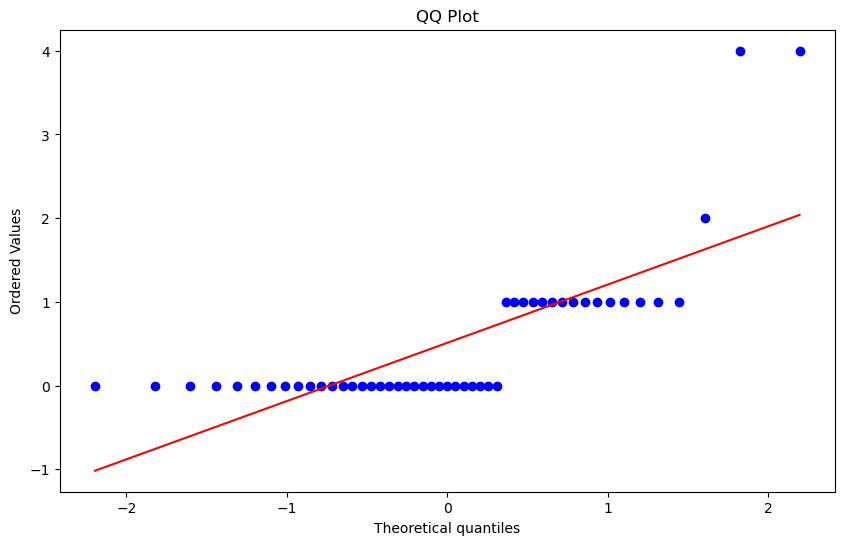

KS Statistic: 0.3509, p-value: 0.0000
The distribution used for fitting is Normal with parameters mu=0.51 and std=0.88.
The KS statistic is 0.3509 with a p-value of 0.0000, indicating the goodness of fit.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the dataset
file_path = 'C:/Users/HP/Downloads/IPL_ball_by_ball_updated till 2024 (1).csv'
data = pd.read_csv(file_path, low_memory=False)

# Display the first few rows and the columns of the dataset to understand its structure
print(data.head())
print(data.columns)

# Filter the data for a specific player, for example, Virat Kohli
player_name = 'CV Varun'
player_data = data[data['Striker'] == player_name]

# Choose a performance metric, for example, runs scored
runs_scored = player_data['runs_scored']

# Display basic statistics for the chosen metric
print(runs_scored.describe())

# Fit a distribution, for example, a normal distribution
mu, std = stats.norm.fit(runs_scored)

# Generate a range of values for plotting the fitted distribution
x = np.linspace(min(runs_scored), max(runs_scored), 100)
pdf = stats.norm.pdf(x, mu, std)

# Plot the histogram and the fitted distribution
plt.figure(figsize=(10, 6))
sns.histplot(runs_scored, bins=20, kde=False, stat='density', color='blue', label='Data')
plt.plot(x, pdf, 'r-', label=f'Normal fit: mu={mu:.2f}, std={std:.2f}')
plt.xlabel('Runs Scored')
plt.ylabel('Density')
plt.legend()
plt.title(f'Distribution Fit for {player_name} Runs Scored')
plt.show()

# QQ plot
plt.figure(figsize=(10, 6))
stats.probplot(runs_scored, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()

# Perform a goodness of fit test
ks_stat, ks_p_value = stats.kstest(runs_scored, 'norm', args=(mu, std))
print(f'KS Statistic: {ks_stat:.4f}, p-value: {ks_p_value:.4f}')

# Interpretation of the results
print(f"The distribution used for fitting is Normal with parameters mu={mu:.2f} and std={std:.2f}.")
print(f"The KS statistic is {ks_stat:.4f} with a p-value of {ks_p_value:.4f}, indicating the goodness of fit.")